In [1]:
import matplotlib.pyplot as plt
import pickle
import os
import numpy as np
import matplotlib.ticker as mtick
plt.rcParams.update({'font.size': 13})

def save_pickle(mdl, name, path):
    pklout = open( os.path.join(path, name + '.pkl'), 'wb')
    pickle.dump(mdl, pklout)
    pklout.close()
    
def load_pickle(path):
    pkl_file = open(path, 'rb')
    mdl = pickle.load(pkl_file)
    pkl_file.close()

    return mdl

In [2]:
cnn_result_bn = load_pickle('../result/mdl_bn_cnn_result.pkl')
snn_result_bn = load_pickle('../result/mdl_bn_snn_result.pkl')
snn_spikes_bn = load_pickle('../result/mdl_bn_spikes_snn_result.pkl')

cnn_result_bn = np.array(cnn_result_bn)*100
snn_result_bn = np.array(snn_result_bn)*100
snn_spikes_bn = np.array(snn_spikes_bn)*10**-6

In [3]:
snn_epochs0=snn_result_bn[0][0]
snn_epochs1=snn_result_bn[0][1]
snn_epochs0 = snn_epochs0[0]
snn_epochs1 = snn_epochs1[0]

snn_epochs0_p0 =snn_spikes_bn[0][0]
snn_epochs1_p0 =snn_spikes_bn[0][1]
snn_epochs0_p0  = snn_epochs0_p0[0]#/np.max(snn_epochs0_p0[0])*100
snn_epochs1_p0  = snn_epochs1_p0[0]#/np.max(snn_epochs1_p0[0])*100

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


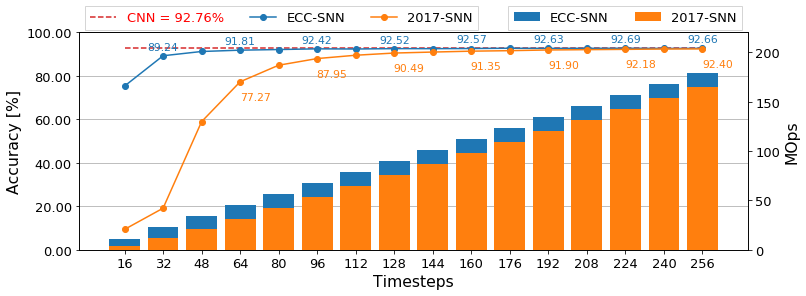

In [5]:
timesteps = [16,32,48,64,80,96,112,128,144,160,176,192,208,224,240,256]

x = np.array(timesteps)

fig, ax1 = plt.subplots(figsize=(12, 4))

ax1.plot(np.arange(snn_epochs1.shape[0]),
          np.ones(snn_epochs1.shape[0])*cnn_result_bn,'r--',color='#d62728',label='CNN = 92.76%')

ax1.plot(np.arange(snn_epochs1.shape[0]),snn_epochs1,'bo-',
         color='#1f77b4',label='ECC-SNN')
ax1.plot(np.arange(snn_epochs1.shape[0]),snn_epochs0,'bo-',
        color='#ff7f0e',label='2017-SNN')

x = list(np.arange(snn_epochs1.shape[0]))
k = 1
for x,y in zip(x,snn_epochs1):
    if k == 1:
        k=0
        continue
    label = "{:.2f}".format(y)

    ax1.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 color="#1f77b4",
                 fontsize='small',
                 textcoords="offset points", # how to position the text
                 xytext=(0,6), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    k+=1
    
    
x = list(np.arange(snn_epochs1.shape[0]))

k=1
n=0
for x,y in zip(x,snn_epochs0):
    if n < 2:
        n += 1
        continue
    if k == 1:
        k=0
        continue
        
    label = "{:.2f}".format(y)

    ax1.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 color="#ff7f0e",
                 fontsize='small',
                 textcoords="offset points", # how to position the text
                 xytext=(15,-18), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    k+=1
    n+=1
    
ax2 = ax1.twinx()
ax1.set_ylim(0, 100)
ax2.set_ylim(0, 220)

ax2.bar(np.arange(snn_epochs1.shape[0]),snn_epochs1_p0,
         color='#1f77b4',label='ECC-SNN')
ax2.bar(np.arange(snn_epochs1.shape[0]),snn_epochs0_p0,
        color='#ff7f0e',label='2017-SNN')


#l = ax1.legend(loc=4, borderaxespad=3,fancybox=True, framealpha=0,prop={'size': 12})

ax1.legend()
ax2.legend()

box = ax1.get_position()
#ax1.set_position([box.x0, box.y0, box.width, box.height*0.8])
#
l = ax1.legend(loc='upper left', bbox_to_anchor=(0,1.15),
          ncol=3, fancybox=False, shadow=False,fontsize='13')

l2 = ax2.legend(loc='upper right', bbox_to_anchor=(1,1.15),
          ncol=3, fancybox=False, shadow=False,fontsize='13')

#plt.ylim(-0, 105);

_l = l.get_texts()
_l[0].set_color("red")
#
#
#ax1.spines['right'].set_visible(False)
#ax1.spines['top'].set_visible(False)
#ax1.spines['left'].set_visible(False)
#axes.spines['bottom'].set_visible(False)
ax1.yaxis.set_major_formatter(mtick.StrMethodFormatter("{x:.2f}"))
##fig.tight_layout()
x = np.array(timesteps)

plt.xticks(np.arange(snn_epochs1.shape[0]),x)
#
ax1.grid(axis='y')
#
ax1.set_ylabel('Accuracy [%]',fontsize='large');
ax2.set_ylabel('MOps',fontsize='large');
ax1.set_xlabel('Timesteps',fontsize='large');
#plt.ylabel('Accuracy');
#
plt.savefig('acc_mops_cifar10.eps',format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


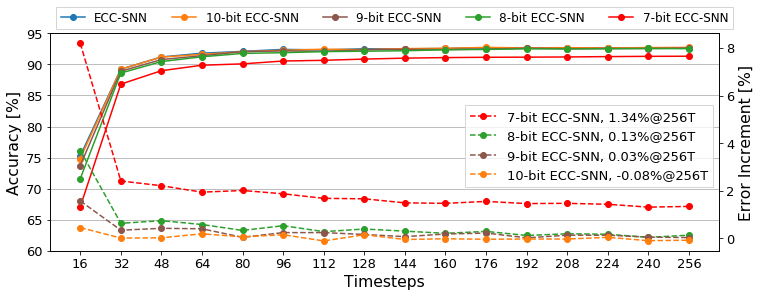

In [6]:
snn_bit = load_pickle('../result/mdl_bn_bit_snn_result.pkl')
snn_bit =snn_bit[0]

bit7  = snn_bit[0][0][0]
bit8  = snn_bit[1][0][0]
bit9  = snn_bit[2][0][0]
bit10 = snn_bit[3][0][0]

bit7  = np.array(bit7 )*100
bit8  = np.array(bit8 )*100
bit9  = np.array(bit9 )*100
bit10 = np.array(bit10)*100

delt7 = (snn_epochs1 - bit7)
delt8 = (snn_epochs1 - bit8)
delt9 = (snn_epochs1 - bit9)
delt10 = (snn_epochs1 - bit10)


x = np.array([16,32,48,64,80,96,112,128,144,160,176,192,208,224,240,256])

fig, ax1 = plt.subplots(figsize=(12, 4))

#ax1.plot(np.arange(snn_epochs1.shape[0]),
#          np.ones(snn_epochs1.shape[0])*cnn_result_bn,'r--',color='#d62728',label='ANN = 92.76%')

ax1.plot(np.arange(snn_epochs1.shape[0]),snn_epochs1,'bo-',
         color='#1f77b4',label='ECC-SNN')
ax1.plot(np.arange(snn_epochs1.shape[0]),bit10,'bo-',
         color='#ff7f0e',label='10-bit ECC-SNN')
ax1.plot(np.arange(snn_epochs1.shape[0]),bit9,'bo-',
         color='#8c564b',label='9-bit ECC-SNN')
ax1.plot(np.arange(snn_epochs1.shape[0]),bit8,'bo-',
         color='#2ca02c',label='8-bit ECC-SNN')
ax1.plot(np.arange(snn_epochs1.shape[0]),bit7,'bo-',
         color='red',label='7-bit ECC-SNN')

ax2 = ax1.twinx()
ax2.plot(np.arange(snn_epochs1.shape[0]),delt7,'bo--',
         color='red',label='7-bit ECC-SNN, %.2f%s@256T'%((delt7[-1]),'%'))
ax2.plot(np.arange(snn_epochs1.shape[0]),delt8,'bo--',
         color='#2ca02c',label='8-bit ECC-SNN, %.2f%s@256T'%((delt8[-1]),'%'))
ax2.plot(np.arange(snn_epochs1.shape[0]),delt9,'bo--',
         color='#8c564b',label='9-bit ECC-SNN, %.2f%s@256T'%((delt9[-1]),'%'))
ax2.plot(np.arange(snn_epochs1.shape[0]),delt10,'bo--',
         color='#ff7f0e',label='10-bit ECC-SNN, %.2f%s@256T'%((delt10[-1]),'%'))
l = ax1.legend(loc='upper left', bbox_to_anchor=(0,1.15),
          ncol=5, fancybox=False, shadow=False,fontsize='12')

#l2 = ax2.legend(loc='upper left', bbox_to_anchor=(0.2,1.2),
#          ncol=3, fancybox=False, shadow=False)

l2 = ax2.legend(loc='upper right', bbox_to_anchor=(1,0.7),
          ncol=1, fancybox=False, shadow=False,fontsize='13')

ax1.set_ylim(60, 95);

ax1.yaxis.set_major_formatter(mtick.StrMethodFormatter("{x:.0f}"))
plt.xticks(np.arange(snn_epochs1.shape[0]),x)
#
ax1.grid(axis='y')
#
ax1.set_ylabel('Accuracy [%]',fontsize='large');
ax1.set_xlabel('Timesteps',fontsize='large');
ax2.set_ylabel('Error Increment [%]',fontsize='large');
#plt.ylabel('Accuracy');
#
plt.savefig('acc_bit_cifar10.eps',format='eps')

In [14]:
snn_epochs1_p0

array([ 11.059363,  23.194804,  34.430027,  45.557734,  56.695985,
        67.821583,  78.930403,  90.009175, 101.137392, 112.226074,
       123.327568, 134.410647, 145.516624, 156.611518, 167.707462,
       178.73398 ])